#Salary Prediction

Data set which captures gross salary from July 1, 2013 through June 30, 2014, which includes only those employees who were employed on or before June 30, 2014. These are the Salaries of Employees in Blatimore. 

Using this data set salary prediction is done.

Importing necessary libraries 

In [1]:
#libraries for data analysis
import numpy as np
import pandas as pd

#libraries for data visvalization
import matplotlib.pyplot as plt
import seaborn as sns

#libray for train_test_split
from sklearn.model_selection import train_test_split

#ibraries for scaling
from sklearn.preprocessing import StandardScaler

#library for model building
from sklearn.linear_model import LinearRegression


#Importing the data set which in CSV format.

In [2]:

salary_org = pd.read_csv("/content/train (1).csv")
salary_org.head()


,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


#Data cleaning and preparation


In [3]:
salary_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


There are 7 columns and 18981 rows
column hiredate and Grosspay has some missing values

In [4]:
salary_cpy = salary_org.copy()

In [5]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

Column name - 'Name' has space before it. Removing unnecessary spaces

In [6]:
salary_cpy.columns = salary_cpy.columns.str.strip()
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

#checking for null values

In [7]:
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

only 70 values in hiredate column is missing which is ery small when compared to total rows of 18981. Hence droping 70 rows

In [8]:
salary_cpy.dropna(subset=['HireDate'],inplace= True)
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

As annual salary and gross pay are interrelated and since gross pay has null values, grosspay column is droped and analysis is performed on Annual salary

In [9]:
salary_cpy.drop(columns=['GrossPay'],inplace=True)

In [10]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00


In [11]:
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [12]:

salary_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          18911 non-null  object
 1   JobTitle      18911 non-null  object
 2   AgencyID      18911 non-null  object
 3   Agency        18911 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18911 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


Lets check the frequency of each values in each columns by using value_counts

In [13]:
salary_cpy.value_counts('Agency')

Agency
Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
M-R Labor Commissioner         6
Legislative Reference          5
Special City Services          4
M-R Cable & Comm               4
Length: 65, dtype: int64

In [14]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
A75041      1
W02554      1
W02688      1
W02171      1
W02682      1
Name: AgencyID, Length: 1177, dtype: int64

It seems that AgencyID dosent represent the agency. Single agency may have multiple agency IDs
 

In [15]:

salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
BUILDING OPERATIONS SUPERVISOR       1
PLATS & RECORDS TECH                 1
PIPEFITTER SUPV                      1
Water Systems Pumping Manager        1
Forestry Technician                  1
Name: JobTitle, Length: 1073, dtype: int64

In [16]:
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
12/28/1980       1
01/24/2013       1
10/22/2002       1
05/22/1989       1
06/24/1985       1
Name: HireDate, Length: 4737, dtype: int64

In [17]:
salary_cpy.AnnualSalary.value_counts()

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     162
             ... 
$52200.00       1
$54330.00       1
$41208.00       1
$67565.00       1
$75667.00       1
Name: AnnualSalary, Length: 1590, dtype: int64

Removing the dollor sign from annual 
salary 

In [18]:
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda  x: (float)(str(x)[1:]))

In [19]:

salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [20]:
salary_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.0+ MB


In [21]:
salary_cpy['Hireday'] = salary_cpy['HireDate'].apply(lambda x: (int)(str(x[3:5])))
salary_cpy['Hiremonth'] = salary_cpy['HireDate'].apply(lambda x: (int)(str(x[:2])))
salary_cpy['Hireyear'] = salary_cpy['HireDate'].apply(lambda x: (int)(str(x[6:])))

In [22]:
salary_cpy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   Hireday       18911 non-null  int64  
 7   Hiremonth     18911 non-null  int64  
 8   Hireyear      18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [23]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Hireday,Hiremonth,Hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


Trimming all categorical columns to make sure there are no leading and trailing spaces and no double space between Words

In [24]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x: str(x).strip().replace("  "," "))
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x: str(x).strip().replace("  "," "))
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x: str(x).strip().replace("  "," "))

In [25]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Hireday,Hiremonth,Hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


It can also be seen that some of the job titles are in Upper case. so with Lower and with mix of both which might effect analysis, so converting them to uppercase and also converting Agency and AgencyID

In [26]:
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).upper())
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).upper())
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).upper())

Checking for outliers using box plot for Annual Salary

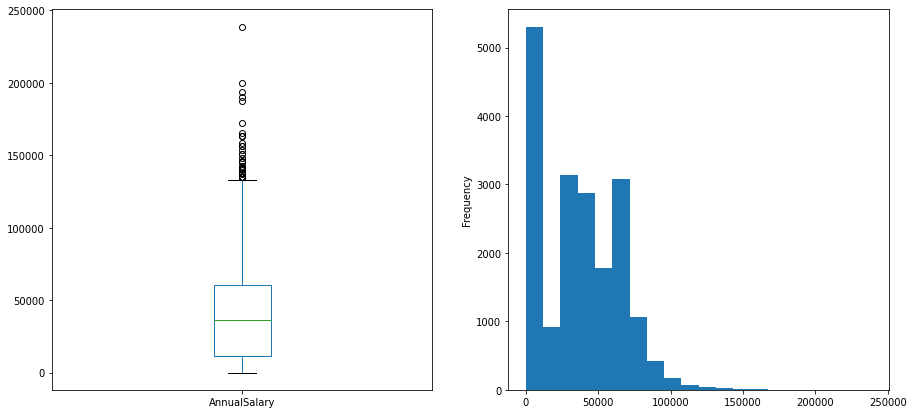

In [27]:
plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
salary_cpy['AnnualSalary'].plot.box()

plt.subplot(1,2,2)
salary_cpy['AnnualSalary'].plot.hist(bins=20)

In [28]:

salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

it is clearly seen few Salaries are way far from other Salaries.
They might effect the prediction. So we have to eliminate them.

Let's delete rows whose annual salary> 1500000 according to box plot

In [29]:
salary_cpy=salary_cpy[salary_cpy['AnnualSalary']<150000]
salary_cpy.shape

(18895, 9)

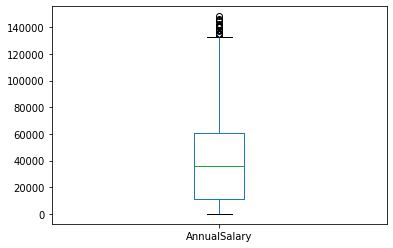

In [30]:
salary_cpy['AnnualSalary'].plot.box()

All the data points above the 75% line are very close to each other so leaving it as is.

The Data is cleaned and ready for further analysis


# **Exploratory Data analysis**

Lets see how Annual Salary is distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


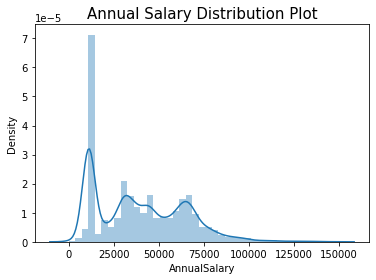

In [31]:
sns.distplot(salary_cpy.AnnualSalary)
plt.title("Annual Salary Distribution Plot",fontsize=15)
plt.show()

The data is distributed very randomly and it seems to be that there aren't many peopel with salary more than 100000

Let us check jobs for which people are being hired the most using barplot

JobTitle
AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (HOURLY)                   597
CROSSING GUARD                     374
EMT FIREFIGHTER SUPPRESSION        358
                                  ... 
FINGERPRINT TECHNICIAN SUPERVI       1
FIRE APPARATUS OFFICER               1
FIRE CAPTAIN EMS CRT                 1
SENIOR CAPITAL PLANNING ANALYS       1
ZONING EXAMINER II                   1
Name: Name, Length: 1055, dtype: int64


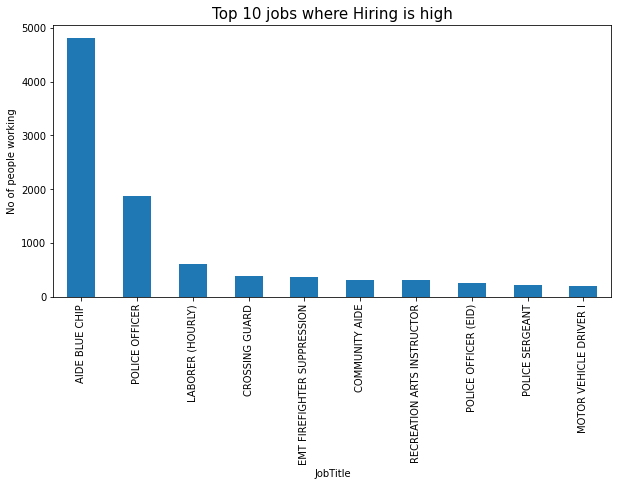

In [32]:
  plt.figure(figsize=(10,5))
  print(salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending = False))
  salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
  plt.ylabel('No of people working')
  plt.title('Top 10 jobs where Hiring is high',fontsize=15)
  plt.show()

The chart clearly shows that more number of People are working as AIDE BLUE CHIP which has double the workers working as POLICE OFFICER which is second Highest. 

All the remaining JobTitles have less than 1000 Workers

JobTitle
FIRE COMMAND STAFF III        140885.000000
EXECUTIVE LEVEL III           138400.000000
FIRE COMMAND STAFF II         129587.000000
WWW CHIEF OF ENGINEERING      127296.000000
PUBLIC HEALTH PHYSICIAN II    125300.000000
                                  ...      
JTPA TRAINEE A MOMR             6240.000000
SR COMPANION STIPEND HLTH       4908.129032
JUDGE'S WIDOW                   3191.666667
MISCELLANEOUS                   2484.000000
COMMITTEE CLERK CC              2000.000000
Name: AnnualSalary, Length: 1055, dtype: float64


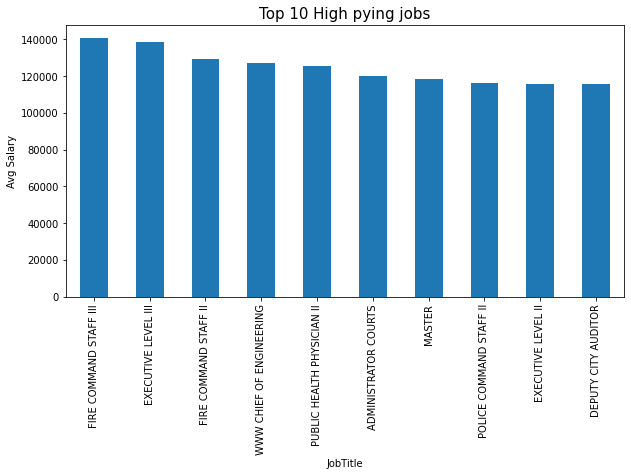

In [33]:
  plt.figure(figsize=(10,5))
  print(salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending = False))
  salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending = False).head(10).plot.bar()
  plt.ylabel('Avg Salary')
  plt.title('Top 10 High pying jobs',fontsize=15)
  plt.show()

Number of Jobs whose average pay is more thatn total average salary

In [35]:
mean_salary = salary_cpy.AnnualSalary.mean()

print(salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean())
print(salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index())
print(" ")
print(" ")
good_paying_jobs = salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_paying_jobs[good_paying_jobs.AnnualSalary>mean_salary]['JobTitle']

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1055, dtype: float64
                         JobTitle  AnnualSalary
0               911 LEAD OPERATOR  47886.000000
1                    911 OPERATOR  42835.743590
2         911 OPERATOR SUPERVISOR  54797.500000
3               ACCOUNT EXECUTIVE  42960.000000
4                    ACCOUNTANT I  46316.642857
...                           ...           ...
1050         ZONING ADMINISTRATOR  82100.000000
1051  ZONING APPEALS ADVISOR BMZA  59274.000000
1052   ZONING ENFORCEMENT 

0                 911 LEAD OPERATOR
1                      911 OPERATOR
2           911 OPERATOR SUPERVISOR
3                 ACCOUNT EXECUTIVE
4                      ACCOUNTANT I
                   ...             
1050           ZONING ADMINISTRATOR
1051    ZONING APPEALS ADVISOR BMZA
1052     ZONING ENFORCEMENT OFFICER
1053              ZONING EXAMINER I
1054             ZONING EXAMINER II
Name: JobTitle, Length: 798, dtype: object

Out of 1055 jobs 798 jobs have salary more than average salary


Let us check the top 10 Agencies and AgencyID with highest number of employees

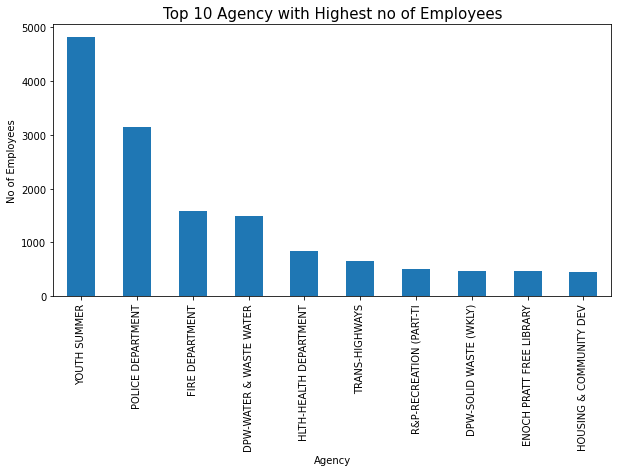

In [36]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('No of Employees')
plt.title('Top 10 Agency with Highest no of Employees',fontsize=15)
plt.show()

The Youth Summer has maximum number of employees followed by Police Department
Fire Department and DPW - Water & Waste Water has almost same number of employees

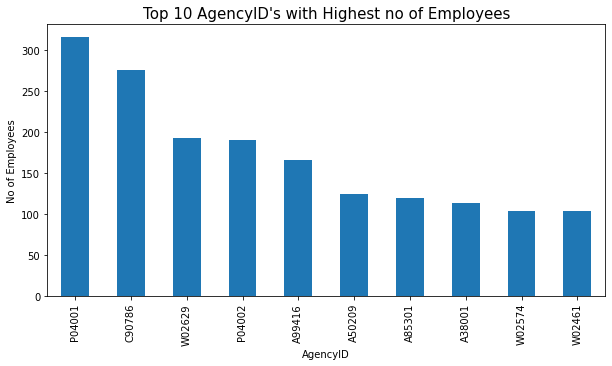

In [37]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('No of Employees')
plt.title("Top 10 AgencyID's with Highest no of Employees",fontsize=15)
plt.show()

The P04001 has maximum number of employees followed by C90786

Lets check weather hireing date have an impact on salary

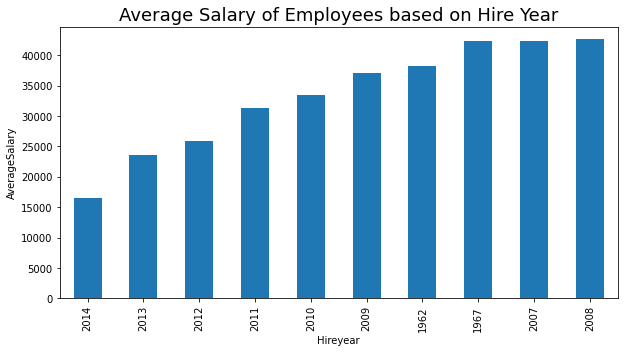

In [38]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Hireyear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel('AverageSalary')
plt.title("Average Salary of Employees based on Hire Year",fontsize=18)
plt.show()

The trend above Suggests that the Salary of the employees increases with experience in the company. So now lets calculate experience in days with Agency.

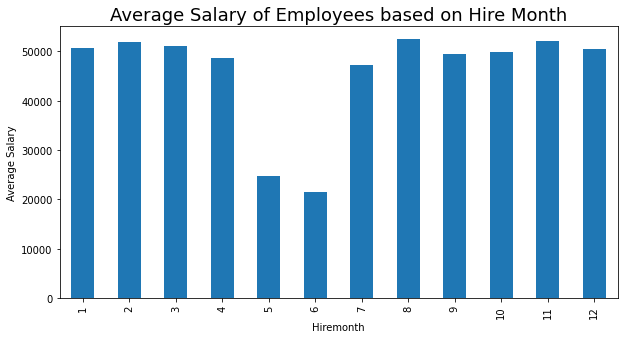

In [39]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Hiremonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('Average Salary')
plt.title("Average Salary of Employees based on Hire Month",fontsize=18)
plt.show()


Except in Months 5 and 6 the distribution is same throughout.
This might be because big agencies donot hire during that time



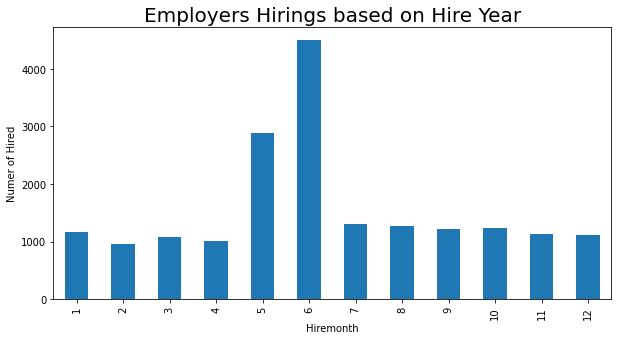

In [40]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Hiremonth'])['Name'].count().plot.bar()
plt.ylabel('Numer of Hired')
plt.title("Employers Hirings based on Hire Year",fontsize=20)
plt.show()


It seem that the hypothypothesis was wrong, more people are hired during 5th and 6th month. Due to mass recrurecruitment average salary is low during these months


Lets check for any other relation between numerical values
 using PairPlot

<Figure size 1080x1440 with 0 Axes>

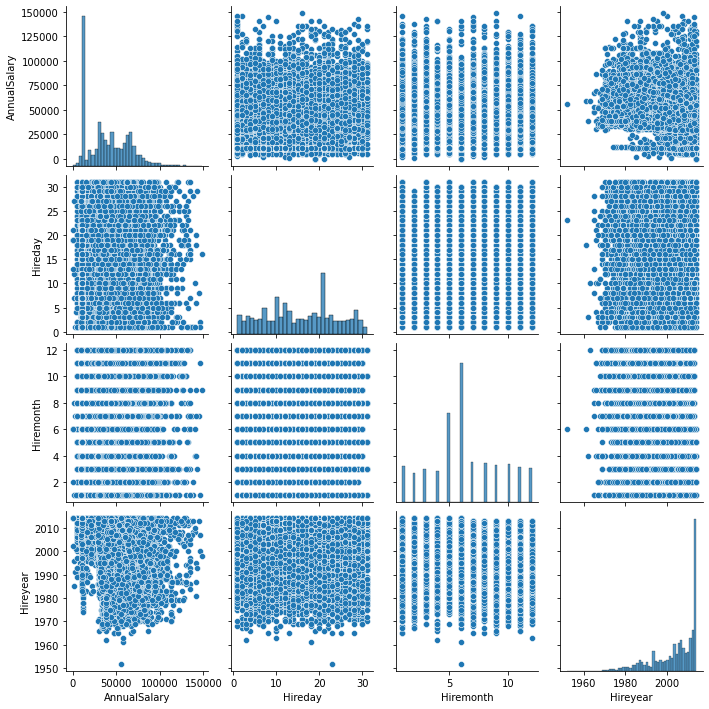

In [41]:
plt.figure(figsize =(15, 20))
sns.pairplot(salary_cpy)
plt.show()

Nothing seems to have any correlation. Lets visualize correlation coefficients using heatmap.



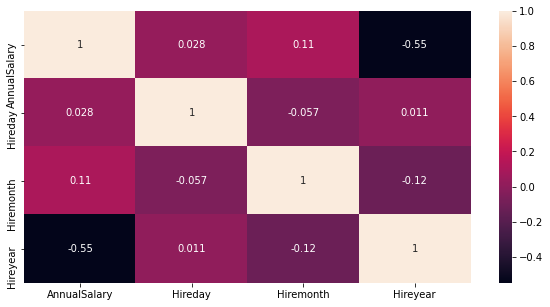

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(),annot=True)

Except for HireYear nothing seems to have significant correlation with Annual Salary

# Feature Engineering

Let us create a copy of data frame to do model building

In [69]:
salary_master = salary_cpy.copy()

Using mean encoding to conert catogorial variables to numarical variables in order to perform Linear machining learning models


In [70]:
mean_job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
print(mean_job)
salary_master['JobTitle']=salary_master['JobTitle'].map(mean_job)
print(salary_master['JobTitle'])

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1055, dtype: float64
0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18895, dtype: float64


In [87]:
mean_agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
print(mean_job)
salary_master['Agency']=salary_master['Agency'].map(mean_agency)
print(salary_master['Agency'])

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1055, dtype: float64
0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61506.879579
             ...     
18976    11313.967200
18977    11313.967200
18978    61506.879579
18979    61506.879579
18980    42565.513078
Name: Agency, Length: 18895, dtype: float64


In [89]:
salary_master

,JobTitle,AgencyID,Agency,AnnualSalary,Hireday,Hiremonth,Hireyear
0,11313.967200,11310.000000,11313.967200,11310.0,10,6,2013
1,47443.500000,46667.000000,51495.424242,53428.0,24,10,1979
2,69750.666667,65926.133333,64874.560224,68300.0,25,9,2006
3,57940.000000,48071.851064,39980.900360,62000.0,23,7,2009
4,44531.160494,44012.307229,61506.879579,43999.0,24,7,2013
...,...,...,...,...,...,...,...
18976,11313.967200,11310.000000,11313.967200,11310.0,21,5,2014
18977,11313.967200,11310.000000,11313.967200,11310.0,21,5,2014
18978,44531.160494,44012.307229,61506.879579,43999.0,17,12,2013
18979,60588.139335,60203.340426,61506.879579,44104.0,23,1,2013


In [71]:
mean_agencyID = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID'] = salary_master['AgencyID'].map(mean_agencyID)
print(salary_master['AgencyID'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18895, dtype: float64


All the required categorical variables are converted to Numerical variables. Lets check the info to check if there are any non-numeric variables

In [72]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  object 
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   Hireday       18895 non-null  int64  
 7   Hiremonth     18895 non-null  int64  
 8   Hireyear      18895 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB


Since we have HireYear, HireMonth and HireDay , we no longer need Date field
And Annual Income is never based on Name, so removing both the columns

In [73]:
salary_master = salary_master.drop(['HireDate','Name'],axis=1)
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18895 non-null  float64
 1   AgencyID      18895 non-null  float64
 2   Agency        18895 non-null  object 
 3   AnnualSalary  18895 non-null  float64
 4   Hireday       18895 non-null  int64  
 5   Hiremonth     18895 non-null  int64  
 6   Hireyear      18895 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 1.2+ MB


<Figure size 1800x1440 with 0 Axes>

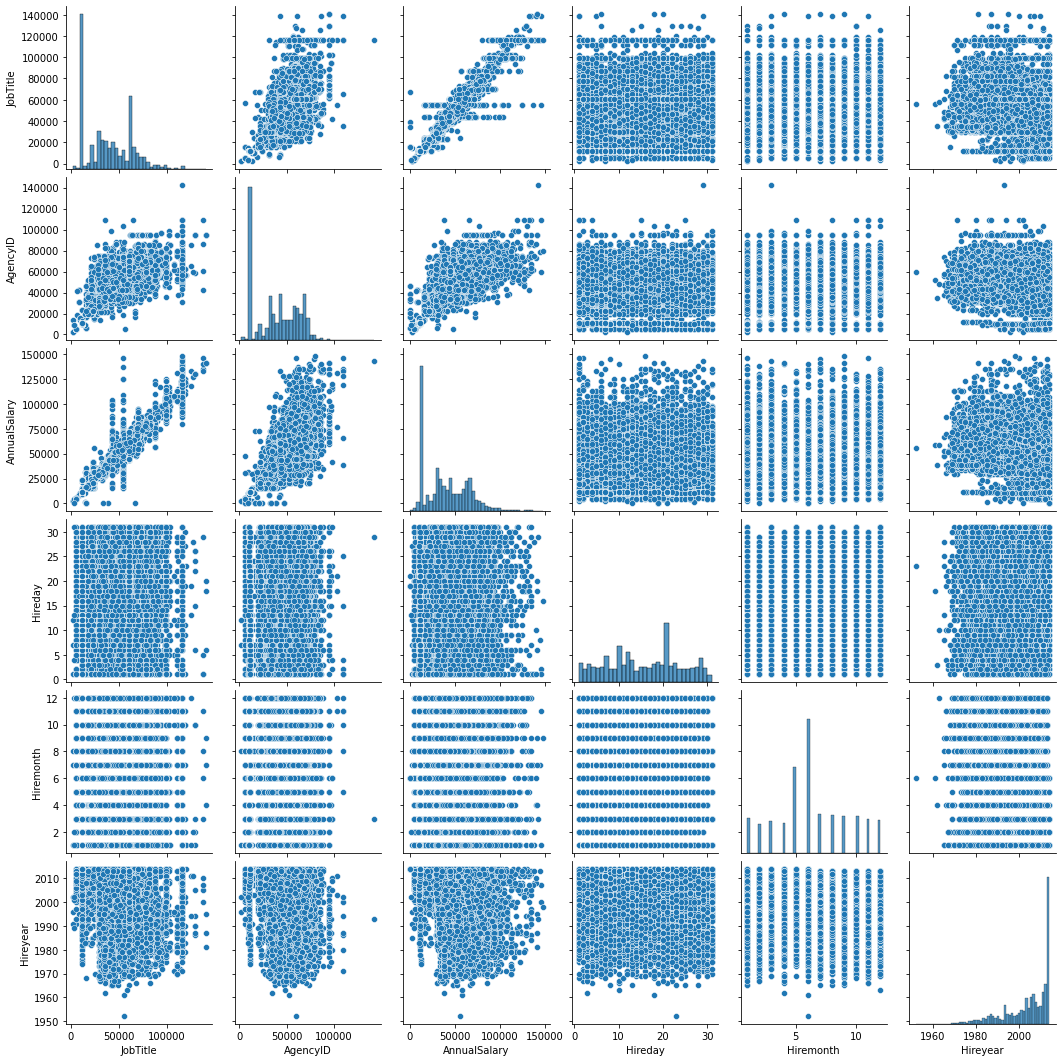

In [74]:
plt.figure(figsize=(25,20))
sns.pairplot(salary_master)
plt.show()

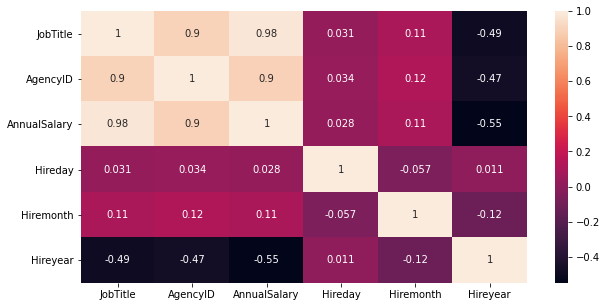

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(salary_master.corr(),annot=True)

we can see that after converting categorial variables to numerical variables there are more correlations between variables which can be use for further analysis

# Train Test Split

Spliting data into train and test set using train_test_split

In [130]:
salary_train, salary_test = train_test_split(salary_master,train_size=0.7,random_state = 42)

In [131]:
print(salary_train.shape,salary_test.shape)

(13226, 7) (5669, 7)


In [132]:
salary_train.head()

,JobTitle,AgencyID,Agency,AnnualSalary,Hireday,Hiremonth,Hireyear
18622,43754.571429,43016.533333,45763.305913,47382.0,7,6,1976
5490,58877.000000,65815.000000,64874.560224,59274.0,8,6,1989
7071,94242.107143,69958.347826,71013.212768,93584.0,30,8,1993
13394,11313.967200,11310.000000,11313.967200,11310.0,12,6,2012
7396,11313.967200,11310.000000,11313.967200,11310.0,7,6,2011


Seperate Dependent and Independent Variables using pop

In [133]:
y_train = salary_train.pop('AnnualSalary')
X_train = salary_train

y_test = salary_test.pop('AnnualSalary')
X_test = salary_test



In [134]:
print(y_train)
print(X_train)

18622    47382.0
5490     59274.0
7071     93584.0
13394    11310.0
7396     11310.0
          ...   
11363    87229.0
12043    22880.0
5466     11310.0
867      82100.0
15878    11310.0
Name: AnnualSalary, Length: 13226, dtype: float64
           JobTitle      AgencyID        Agency  Hireday  Hiremonth  Hireyear
18622  43754.571429  43016.533333  45763.305913        7          6      1976
5490   58877.000000  65815.000000  64874.560224        8          6      1989
7071   94242.107143  69958.347826  71013.212768       30          8      1993
13394  11313.967200  11310.000000  11313.967200       12          6      2012
7396   11313.967200  11310.000000  11313.967200        7          6      2011
...             ...           ...           ...      ...        ...       ...
11363  91284.442308  65876.608696  61506.879579       13          2      1999
12043  24202.971014  24515.227273  24202.971014       13          1      2014
5466   11313.967200  11310.000000  11313.967200       12     

# **Scaling**

In [135]:
scaler = StandardScaler()

X_train.values[:] = scaler.fit_transform(X_train)

X_train.describe()

,JobTitle,AgencyID,Agency,Hireday,Hiremonth,Hireyear
count,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000
mean,39597.992488,39558.515634,39556.473764,15.783532,6.387192,2004.093982
std,24423.714059,22280.827642,20975.231886,8.369389,2.938078,10.358570
min,2000.000000,2000.000000,10234.535294,1.000000,1.000000,1952.000000
25%,11313.967200,11310.000000,11313.967200,9.000000,5.000000,1998.000000
50%,35992.261111,41431.741935,42565.513078,16.000000,6.000000,2007.000000
75%,60588.139335,59722.666667,61506.879579,22.000000,9.000000,2013.000000
max,140885.000000,142700.000000,86492.300000,31.000000,12.000000,2014.000000


In [136]:
X_test.values[:] = scaler.transform(X_test)

X_test.describe()

,JobTitle,AgencyID,Agency,Hireday,Hiremonth,Hireyear
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,39430.715944,39522.817000,39527.580760,15.721115,6.328806,2004.041806
std,24127.947466,22222.906307,21045.623356,8.426067,2.973213,10.470234
min,2000.000000,2000.000000,10234.535294,1.000000,1.000000,1961.000000
25%,11313.967200,11310.000000,11313.967200,9.000000,5.000000,1998.000000
50%,36083.115385,41730.721519,42565.513078,16.000000,6.000000,2007.000000
75%,60588.139335,59373.403590,61506.879579,22.000000,8.000000,2013.000000
max,138400.000000,109113.571429,86492.300000,31.000000,12.000000,2014.000000


# Model Building

In [137]:
lr = LinearRegression()

salary_reg = lr.fit(X_train,y_train)

In [138]:
salary_reg.score(X_train,y_train)

0.964833881870778

In [139]:
salary_reg.score(X_test,y_test)

0.9634621082754347

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


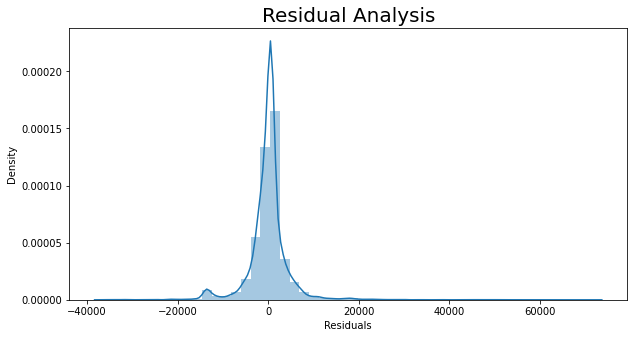

In [140]:
  plt.figure(figsize=(10,5))
y_train_pred = salary_reg.predict(X_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

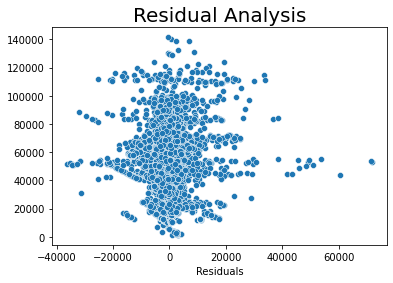

In [141]:
sns.scatterplot(x=res,y=y_train_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

In [142]:
print("Coef are:",salary_reg.coef_)

print("Intercept is",salary_reg.intercept_)

Coef are: [ 9.16998137e-01  1.25613975e-01 -8.07916695e-02 -2.69941071e+00
 -2.13272425e+01 -1.97835556e+02]
Intercept is 398203.54130418645


# Observations from Model:
Of all the features given AgencyID,JobTitle and HireYear are the major driver for expaining the variance of Annual Salary as they have higher coefficient value.

Out of the above features, Hire Year is negatively related to Annual Salary which is same as we have seen while performing EDA.